# Machine Learning on Water Potability


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px
from scipy import stats

In [ ]:
# Importing dataset
df = pd.read_csv('water_potability.csv')

# Displaying first few rows of dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
# Checking for missing values
df.isnull().sum() / len(df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [7]:
# Handling missing values
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

C:\Users\Pooja Dinani\AppData\Local\Temp\ipykernel_10880\2257043705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(), inplace=True)
C:\Users\Pooja Dinani\AppData\Local\Temp\ipykernel_10880\2257043705.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [8]:
# Checking for missing values again
df.isnull().sum() / len(df) * 100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [9]:
# Checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3271    False
3272    False
3273    False
3274    False
3275    False
Length: 3276, dtype: bool

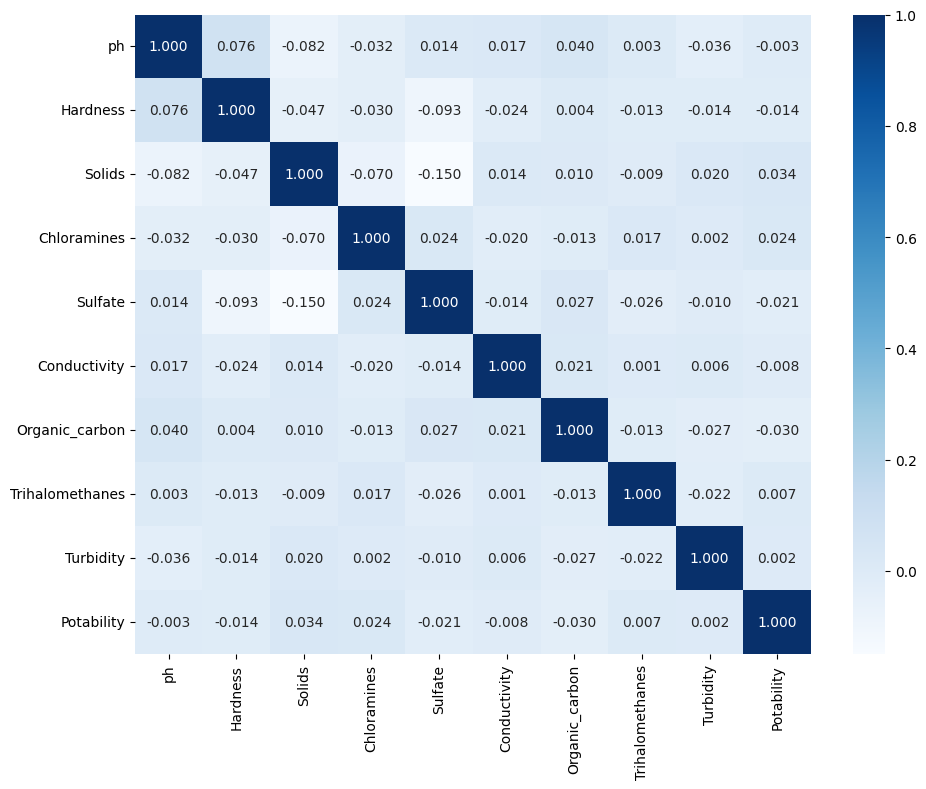

In [10]:
# Analyzing relationship between variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.3f')
plt.tight_layout()
plt.show()

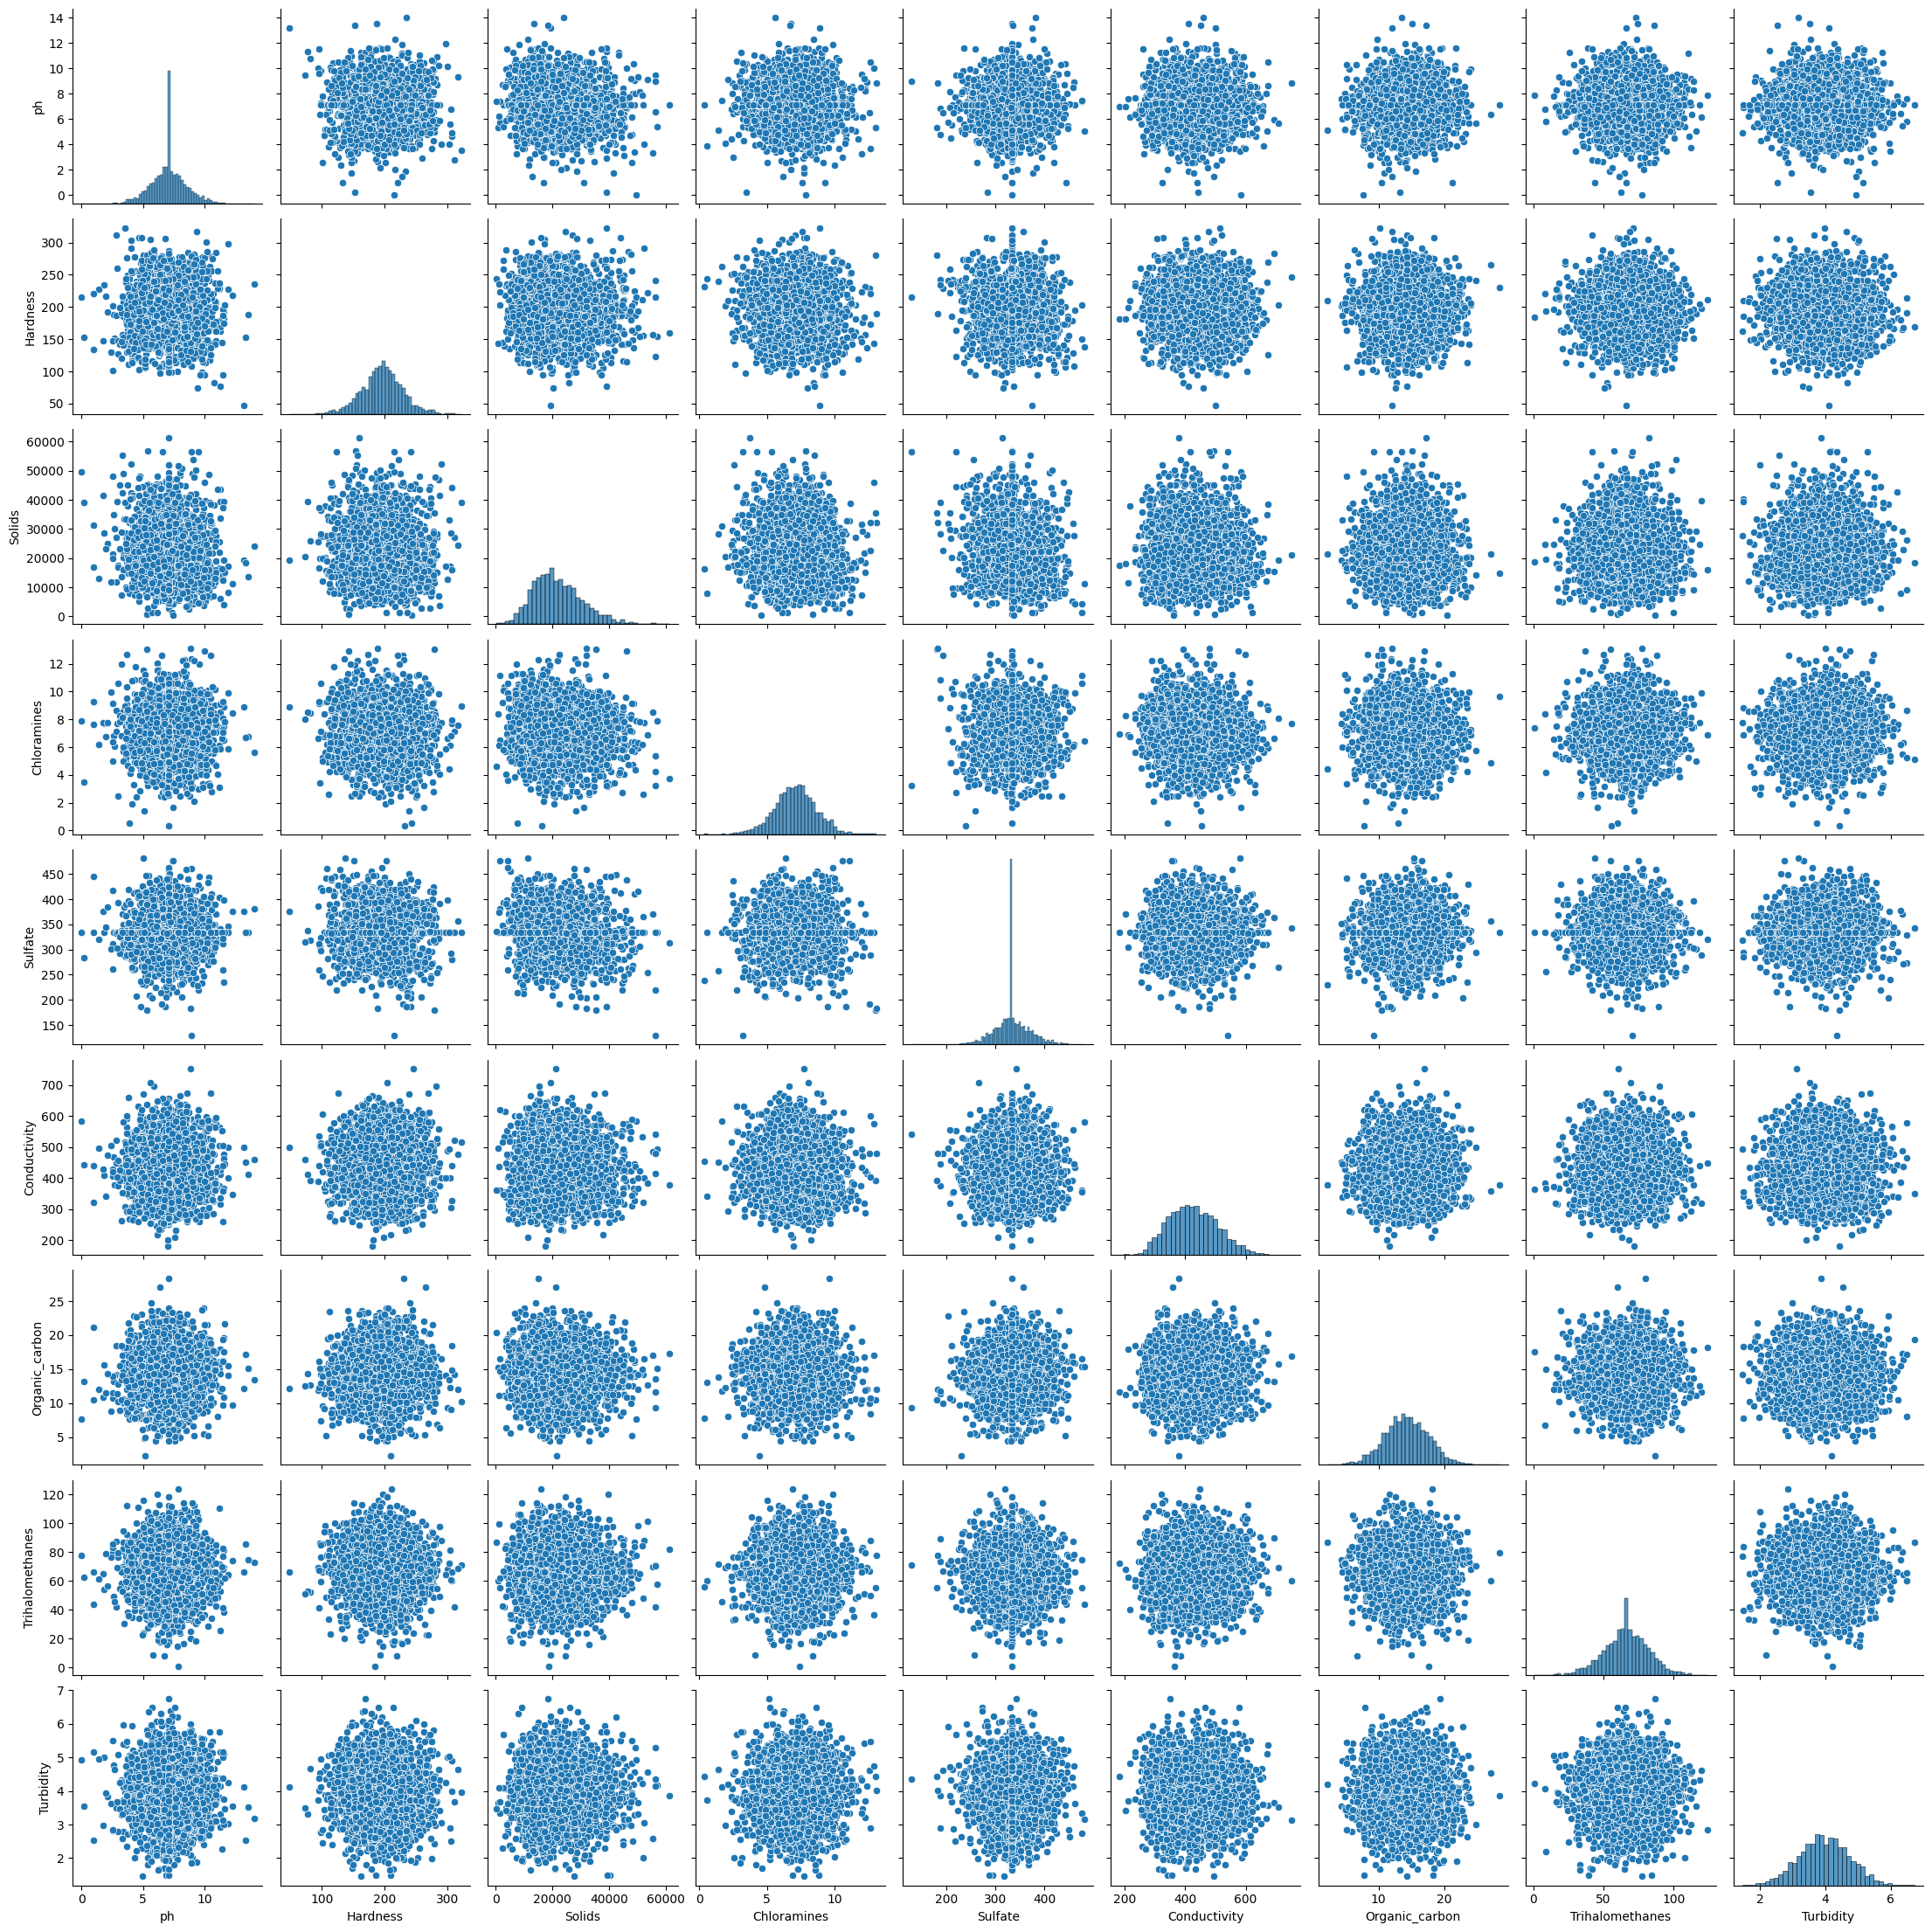

In [11]:
# Analyzing relationship between variables
sns.pairplot(df.drop('Potability', axis=1))
plt.show()

In [12]:
# Displaying statistical summary of dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


C:\Users\Pooja Dinani\AppData\Local\Temp\ipykernel_10880\1939572658.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_long_sample = df_long.groupby('Parameter').apply(lambda x: x.sample(n=50)).reset_index(drop=True)


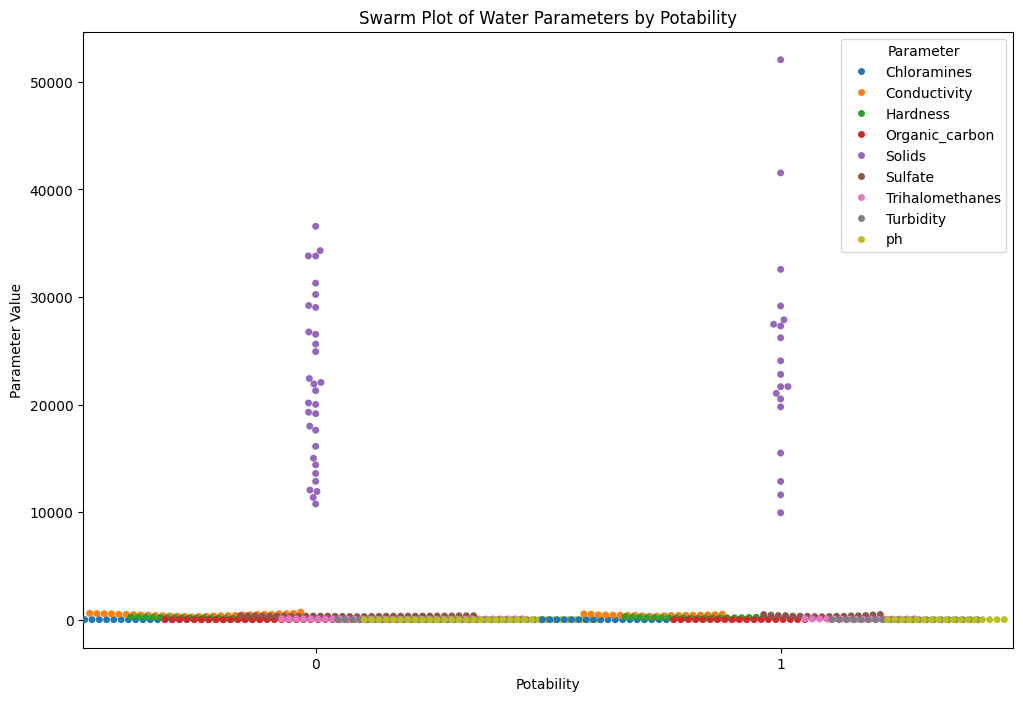

In [13]:
# Swarmplot of dataset
df_long = pd.melt(df, id_vars=['Potability'], var_name='Parameter', value_name='Value')
df_long_sample = df_long.groupby('Parameter').apply(lambda x: x.sample(n=50)).reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Potability', y='Value', data=df_long_sample, hue='Parameter', dodge=True)
plt.xlabel('Potability')
plt.ylabel('Parameter Value')
plt.title('Swarm Plot of Water Parameters by Potability')
plt.show()

In [14]:
# Scaling of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Potability'])), columns=df.columns[:-1])
df_scaled['Potability'] = df['Potability']

In [15]:
# Displaying statistical summary of scaled dataset
df_scaled.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.505771,0.540231,0.356173,0.529963,0.581699,0.427940,0.463026,0.532673,0.475853,0.390110
std,0.104997,0.119263,0.143968,0.123921,0.102669,0.141336,0.126750,0.127938,0.147548,0.487849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448405,0.469432,0.251957,0.452088,0.534313,0.322196,0.378000,0.453584,0.376198,0.000000
50%,0.505771,0.542401,0.338338,0.530591,0.581699,0.420386,0.460473,0.532673,0.473630,0.000000
75%,0.562146,0.613857,0.443498,0.607662,0.628882,0.525145,0.550102,0.615994,0.576729,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Pooja Dinani\AppData\Local\Temp\ipykernel_10880\1756450091.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_scaled_long_sample = df_scaled_long.groupby('Parameter').apply(lambda x: x.sample(n=50)).reset_index(drop=True)


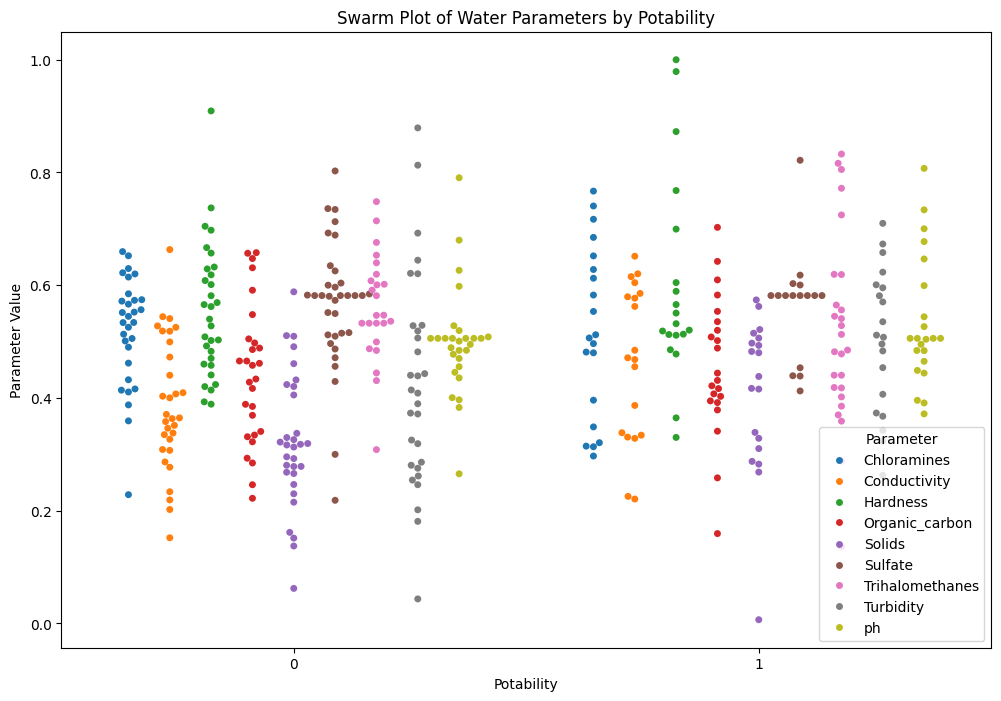

In [16]:
# Swarmplot of scaled dataset
df_scaled_long = pd.melt(df_scaled, id_vars=['Potability'], var_name='Parameter', value_name='Value')
df_scaled_long_sample = df_scaled_long.groupby('Parameter').apply(lambda x: x.sample(n=50)).reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Potability', y='Value', data=df_scaled_long_sample, hue='Parameter', dodge=True)
plt.xlabel('Potability')
plt.ylabel('Parameter Value')
plt.title('Swarm Plot of Water Parameters by Potability')
plt.show()

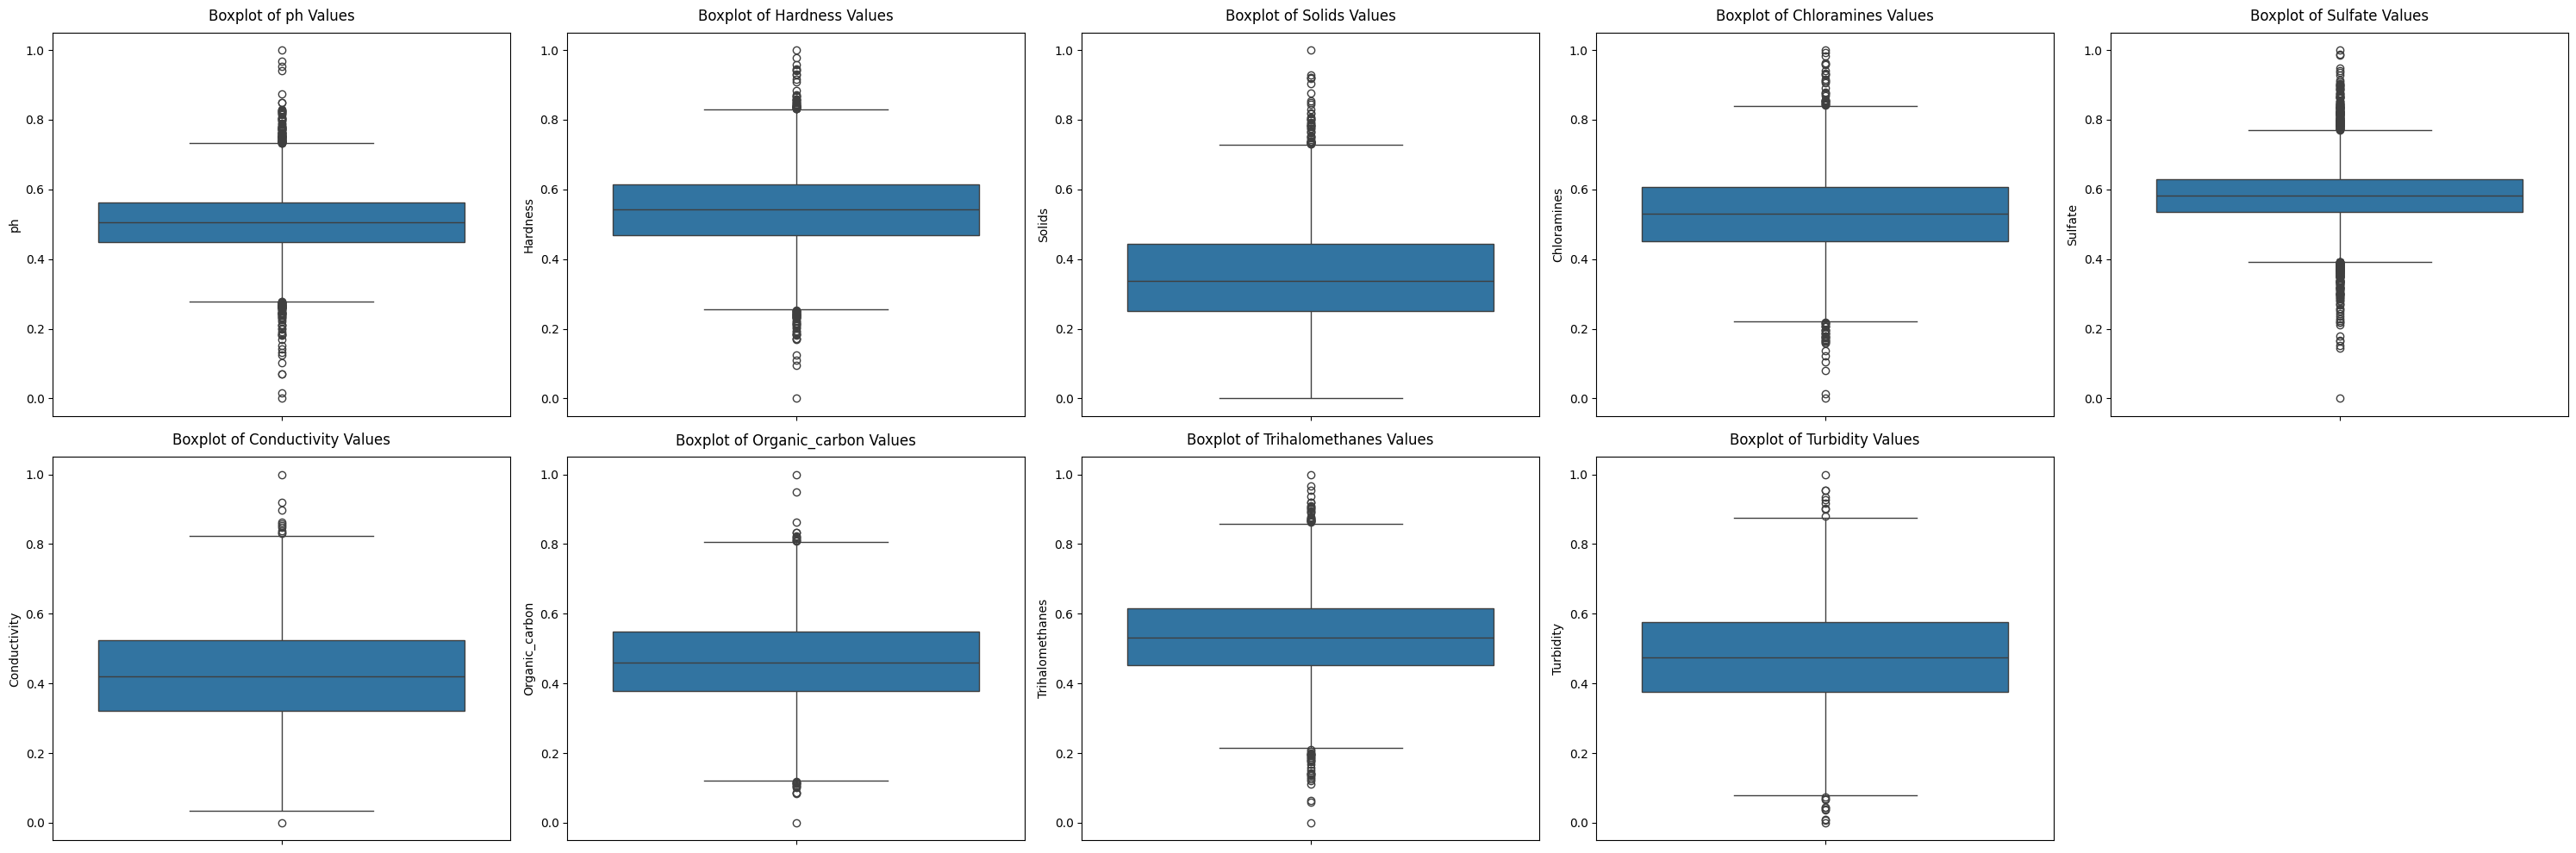

In [17]:
# Checking outliers in scaled dataset

# Excluding 'Potability' column
cols_to_plot = [col for col in df_scaled.columns if col != 'Potability']

# Setting number of columns and rows for subplots
cols_num = len(cols_to_plot)
rows_num = 2

# Calculating number of subplots needed
subplots_needed_bp = cols_num

# Calculating the number of subplots per row
subplots_per_row = cols_num // rows_num + (cols_num % rows_num > 0)

# Creating subplots with layout
fig, axes = plt.subplots(rows_num, subplots_per_row, figsize=(30, 10))
axes = axes.flatten()

# Displaying boxplot for each column excluding Potability
for idx, column in enumerate(cols_to_plot):
    sns.boxplot(y=df_scaled[column], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {column} Values', pad=10)  
# Removing empty subplots
for idx in range(subplots_needed_bp, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and font size
plt.tight_layout()
plt.show()


In [18]:
# Removing outliers using IQR method
columns_to_exclude = ['Potability']
Q1 = df_scaled.drop(columns=columns_to_exclude).quantile(0.25)
Q3 = df_scaled.drop(columns=columns_to_exclude).quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df_scaled.drop(columns=columns_to_exclude) < (Q1 - 1.5 * IQR)) | (df_scaled.drop(columns=columns_to_exclude) > (Q3 + 1.5 * IQR))).any(axis=1)
df_scaled_no_outliers_iqr = df_scaled[~outlier_mask]

print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape After Removing Outliers (IQR method):", df_scaled_no_outliers_iqr.shape)

Original DataFrame Shape: (3276, 10)
DataFrame Shape After Removing Outliers (IQR method): (2666, 10)


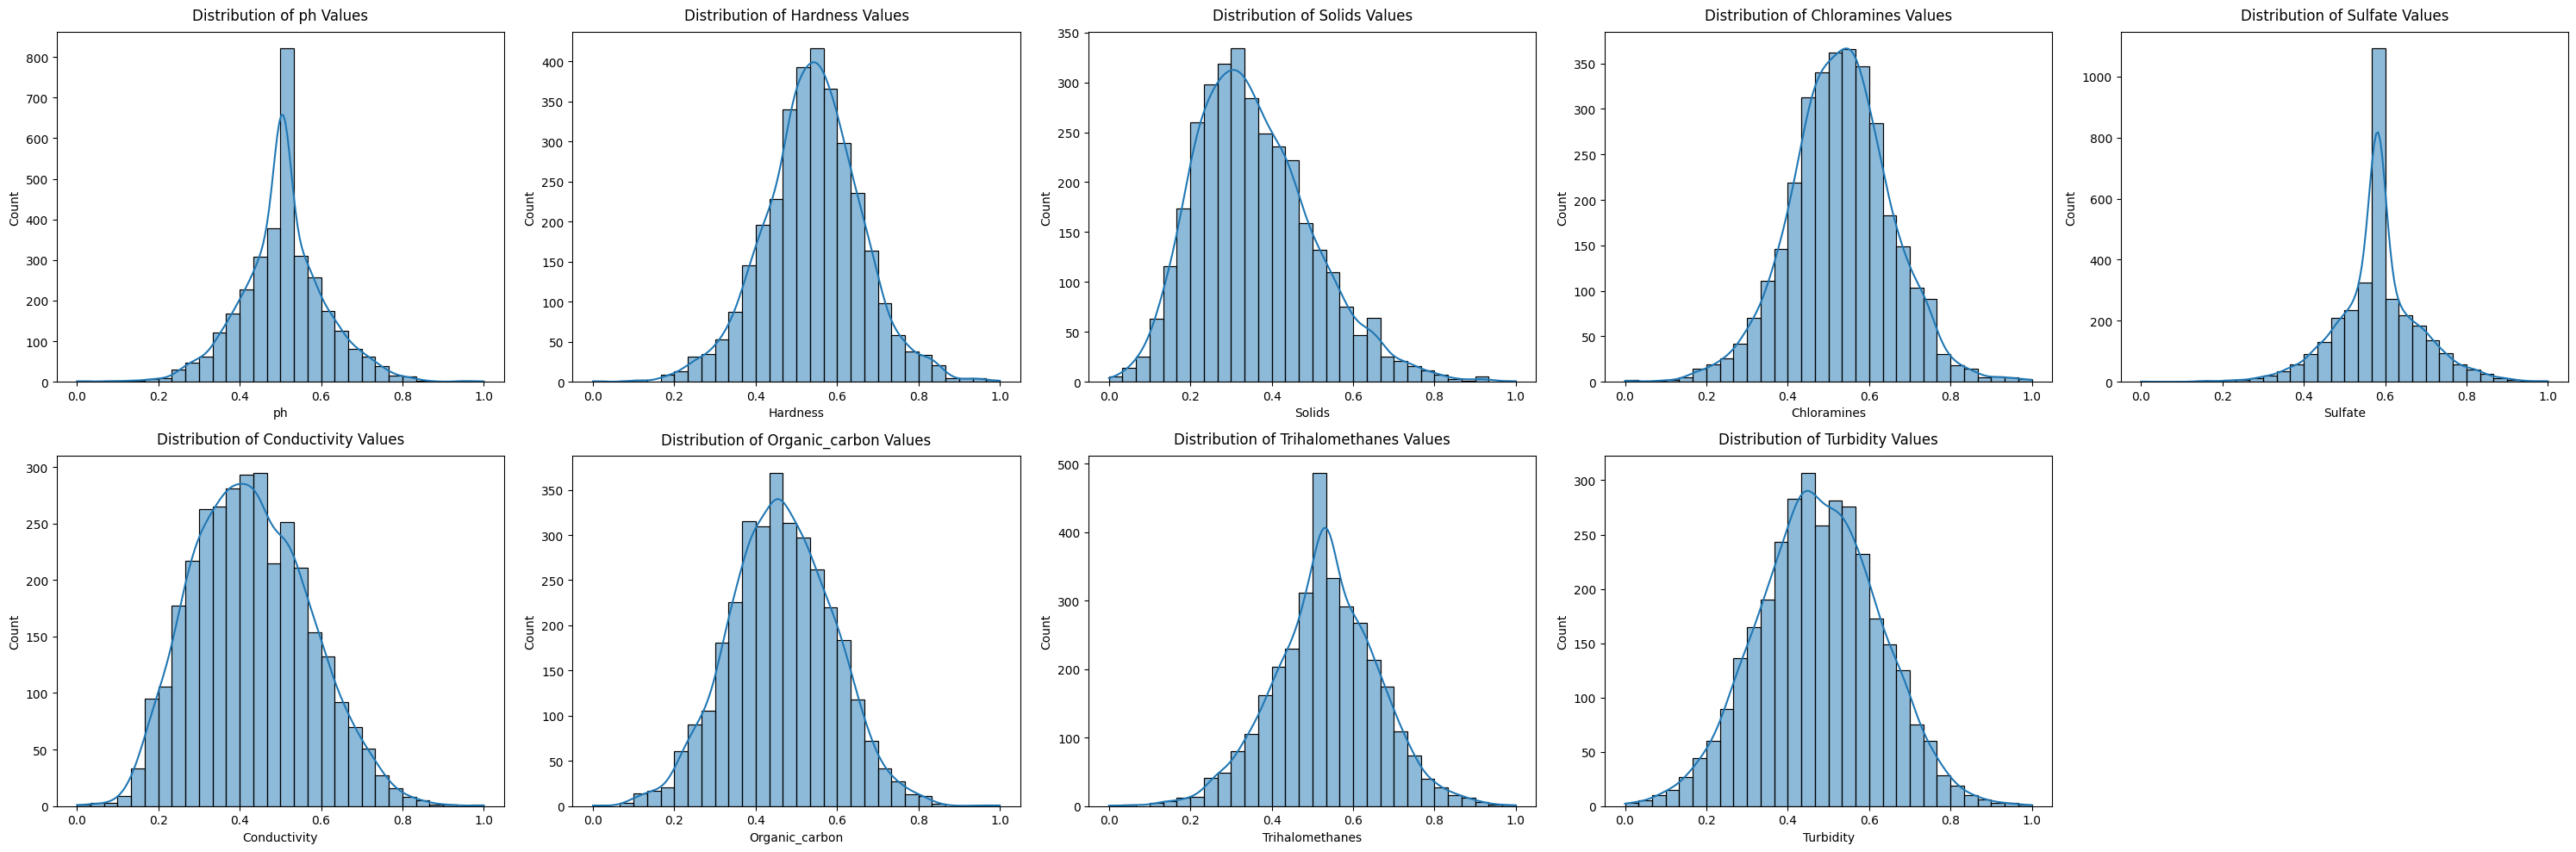

In [19]:
# Checking normality of scaled dataset

# Excluding 'Potability' column
cols_to_plot1 = [col for col in df_scaled.columns if col != 'Potability']

# Setting number of columns and rows for subplots
cols_num1 = len(cols_to_plot1)
rows_num1 = 2

# Calculating number of subplots needed
subplots_needed1 = cols_num1

# Calculating the number of subplots per row
subplots_per_row1 = cols_num1 // rows_num1 + (cols_num1 % rows_num1 > 0)

# Creating subplots with layout
fig, axes = plt.subplots(rows_num1, subplots_per_row1, figsize=(30, 10))
axes = axes.flatten()

# Displaying histogram for each column excluding Potability
for idx, column in enumerate(cols_to_plot1):
    sns.histplot(df_scaled[column], bins=30, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column} Values', pad=10)  # Adjust title position

# Removing empty subplots
for idx in range(subplots_needed1, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and font size
plt.tight_layout()
plt.show()

In [20]:
# Appling shapiro test 
from scipy.stats import shapiro
cols_for_shapiro = [col for col in df_scaled.columns if col != 'Potability']

for column in cols_for_shapiro:
    stat, p_value = shapiro(df_scaled[column])
    print(f"{column}: Statistic={stat}, p-value={p_value}")

ph: Statistic=0.9799439996860713, p-value=3.9986319514453834e-21
Hardness: Statistic=0.9959691554184457, p-value=9.609728989065804e-08
Solids: Statistic=0.9777255694314414, p-value=2.951167378434706e-22
Chloramines: Statistic=0.9967728624332645, p-value=1.818108595864286e-06
Sulfate: Statistic=0.9591512707473642, p-value=2.0198788405303601e-29
Conductivity: Statistic=0.9929677990265398, p-value=1.494154318094006e-11
Organic_carbon: Statistic=0.9995233422356162, p-value=0.6251250420358585
Trihalomethanes: Statistic=0.996984138674661, p-value=4.176881265189827e-06
Turbidity: Statistic=0.9996983290119651, p-value=0.9335787571503222


In [21]:
# Best model selection
X = df_scaled[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df_scaled['Potability']

# Importing machine learning models
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC        
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making list of supervised machine learning classification models
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

# Assigning names to listed models
model_names = [
    'LogisticRegression',
    'SVC_model',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'KNeighborsClassifier'
]

models_scores = []
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    models_scores.append((model_name, accuracy)) 

sorted_models = sorted(models_scores, key=lambda x: x[1], reverse=True)
for model in sorted_models: 
    print("Accuracy Score: ",f'{model[0]} : {model[1]:.2f}')

Accuracy Score:  SVC_model : 0.70
Accuracy Score:  RandomForestClassifier : 0.68
Accuracy Score:  KNeighborsClassifier : 0.65
Accuracy Score:  LogisticRegression : 0.63
Accuracy Score:  DecisionTreeClassifier : 0.57


In [23]:
# Making predictions using SVC model
from sklearn.svm import SVC        

# Defining X and y
X = df_scaled[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df_scaled['Potability']

# Calling model
model = SVC()

# Fitting model
model.fit(X, y)

# Making Predictions
prediction = model.predict(scaler.transform([[6, 100, 12000, 867, 265, 123, 111, 90, 888]]))
print("Prediction:", prediction)


Prediction: [1]


c:\Users\Pooja Dinani\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Pooja Dinani\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
